# NE 579 Homework Number 2: Data Statistics

## Import required libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.io as sio
from scipy.stats import trim_mean, skew, kurtosis, norm

/Users/jrpowers-luhn/miniconda3/envs/579/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
sns.color_palette('coolwarm')

[(0.40442129049411762, 0.53464349044705883, 0.93200191263529408),
 (0.60316206791764704, 0.73152747735294121, 0.99956527853725485),
 (0.78672070135686278, 0.84480721036862749, 0.93981038494901958),
 (0.93066859633333332, 0.81887699965490202, 0.75914639069803924),
 (0.96731651566666665, 0.65747082880784313, 0.53816015072941181),
 (0.88464343869411766, 0.41001709788235297, 0.32250654924705885)]

## Load the data from the file

In [3]:
fn = 'hwkdata.mat'
data_dict = sio.loadmat(fn)
print(data_dict.keys())

dict_keys(['__header__', '__version__', '__globals__', 'x', 'y'])


In [4]:
data_dict['x'].shape

(252, 14)

In [5]:
data_dict['y'].shape

(252, 1)

In [6]:
data = np.append(data_dict['x'], data_dict['y'], 1)

In [7]:
data.shape

(252, 15)

Now the 2-d array `data` contains 252 samples, each with 14 input variables and 1 output variable

I will want to label the columns later...

In [8]:
parameter_names = [
    'Age',
    'Weight',
    'Height',
    'Adiposity Index',
    'Neck circumference',
    'Chest circumference',
    'Abdomen circumference',
    'Hip circumference',
    'Thigh circumference',
    'Knee circumference',
    'Ankle circumference',
    'Extended bicep circumference',
    'Forearm circumference',
    'Wrist circumference',
    '% Bodyweight'
]

## Calculate statistical properties of the data:
- Maximum
- Minimum
- Mean
- Median
- 20% trimmed mean
- Standard deviation
- Variance
- Skewness
- Kurtosis

### Maximum

In [9]:
np.max(data, axis=0)

array([  81.  ,  363.15,   77.75,   48.9 ,   51.2 ,  136.2 ,  148.1 ,
        147.7 ,   87.3 ,   49.1 ,   33.9 ,   45.  ,   34.9 ,   21.4 ,
         45.1 ])

### Minimum

In [10]:
np.min(data, axis=0)

array([  22. ,  118.5,   29.5,   18.1,   31.1,   79.3,   69.4,   85. ,
         47.2,   33. ,   19.1,   24.8,   21. ,   15.8,    0. ])

### Mean

In [11]:
np.mean(data, axis=0)

array([  44.88492063,  178.92440476,   70.14880952,   25.43690476,
         37.99206349,  100.82420635,   92.55595238,   99.9047619 ,
         59.40595238,   38.59047619,   23.10238095,   32.2734127 ,
         28.66388889,   18.2297619 ,   18.93849206])

### Median

In [12]:
np.median(data, axis=0)

array([  43.  ,  176.5 ,   70.  ,   25.05,   38.  ,   99.65,   90.95,
         99.3 ,   59.  ,   38.5 ,   22.8 ,   32.05,   28.7 ,   18.3 ,   19.  ])

### 20% Trimmed Mean

In [13]:
trim_mean(data, 0.2, axis=0)

array([  44.44078947,  176.55361842,   70.25      ,   25.05986842,
         37.92894737,  100.12763158,   91.80789474,   99.32828947,
         59.13092105,   38.49144737,   22.91381579,   32.16118421,
         28.69934211,   18.21776316,   18.86578947])

### Standard Deviation

In [14]:
np.std(data, axis=0)

array([ 12.57701082,  29.3307901 ,   3.65558099,   3.64086527,
         2.4260852 ,   8.41373177,  10.76166054,   7.14982914,
         5.2395251 ,   2.4070145 ,   1.69152717,   3.0152732 ,
         2.01667787,   0.93173074,   7.73546169])

### Variance

In [15]:
np.var(data, axis=0)

array([ 158.18120118,  860.29524766,   13.36327239,   13.25589994,
          5.88588939,   70.79088231,  115.81333759,   51.12005669,
         27.4526233 ,    5.79371882,    2.86126417,    9.09187248,
          4.06698964,    0.86812217,   59.83736757])

### Skewness

In [16]:
skew(data, axis=0)

array([ 0.28183067,  1.19807685, -5.35287991,  1.55239101,  0.54932508,
        0.6774921 ,  0.83341904,  1.48820106,  0.81631331,  0.51366304,
        2.24168861,  0.28382759, -0.21802506,  0.27993485,  0.14338879])

### Kurtosis

In [17]:
kurtosis(data, axis=0)

array([ -0.43193939,   5.14182358,  58.34569713,   6.55632326,
         2.64223799,   0.94408639,   2.18073601,   7.30021682,
         2.5894009 ,   1.01687492,  11.68578418,   0.46494688,
         0.82550054,   0.36415485,  -0.32445733])

#### Also calculate $Kurt - 3$

In [18]:
kurtosis(data, axis=0) - 3 * np.ones_like(kurtosis(data, axis=0))

array([ -3.43193939,   2.14182358,  55.34569713,   3.55632326,
        -0.35776201,  -2.05591361,  -0.81926399,   4.30021682,
        -0.4105991 ,  -1.98312508,   8.68578418,  -2.53505312,
        -2.17449946,  -2.63584515,  -3.32445733])

#### Difference between mean and median

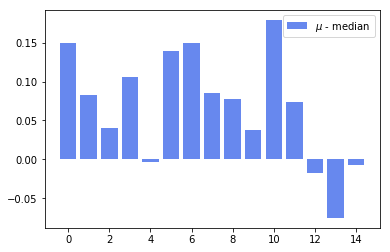

In [70]:
with sns.color_palette('coolwarm'):
    f = plt.figure()
    s = np.divide(np.mean(data, axis=0) - np.median(data, axis=0), np.std(data, axis=0))
    ax = plt.subplot(121)
    plt.bar(np.arange(s.shape[0]), s, label=r'$\mu$ - median')
    #plt.bar(np.arange(s.shape[0]), np.mean(data, axis=0) - np.median(data, axis=0), label=r'$\mu$ - median')
    #plt.bar(np.arange(s.shape[0]), kurtosis(data, axis=0) / kurtosis(data, axis=0).max(axis=0),
    #        alpha=0.5, label='Kurtosis')
    #plt.bar(np.arange(s.shape[0]), skew(data, axis=0),
    #        alpha=0.5, label='Skewness')
    plt.legend(loc="upper right")
    plt.savefig('images/mu_minus_median.png', dpi=300, bbox_inches='tight')
    plt.show()

From this plot we see that the mean (sensitive to outliers) exceeds the median (insensitive to outliers) 

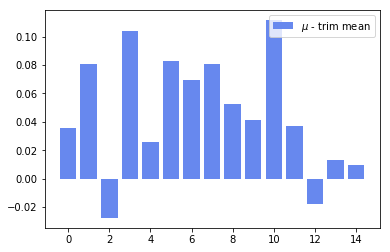

In [69]:
with sns.color_palette('coolwarm'):
    plt.bar(np.arange(np.mean(data, axis=0).shape[0]),
        np.divide(np.mean(data, axis=0) - trim_mean(data, 0.2, axis=0), np.std(data, axis=0)), label=r'$\mu$ - trim mean')
    plt.legend(loc='upper right')
    #plt.bar(np.arange(trim_mean(data, 0.2, axis=0).shape[0]),
    #        trim_mean(data, 0.2, axis=0))
    plt.savefig('images/mu_minus_trimmed_mean.png', dpi=300, bbox_inches='tight')
    plt.show()

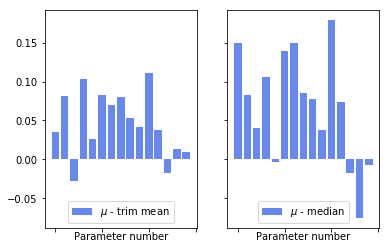

In [85]:
with sns.color_palette('coolwarm'):
    f = plt.figure()
    ax1 = f.add_subplot(121)
    ax1.bar(np.arange(np.mean(data, axis=0).shape[0]),
            np.divide(np.mean(data, axis=0) - trim_mean(data, 0.2, axis=0),
                      np.std(data, axis=0)), 
            label=r'$\mu$ - trim mean')
    ax1.legend(loc='lower center')
    
    ax2 = f.add_subplot(122, sharey=ax1)
    s = np.divide(np.mean(data, axis=0) - np.median(data, axis=0), np.std(data, axis=0))
    ax2.bar(np.arange(s.shape[0]), s, label=r'$\mu$ - median')
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.legend(loc="lower center")
    
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    
    ax1.set_xlabel('Parameter number')
    ax2.set_xlabel('Parameter number')
    
    plt.savefig('images/robust_statistics.png', dpi=300, bbox_inches='tight')
    


# Now look at covariance and correlation

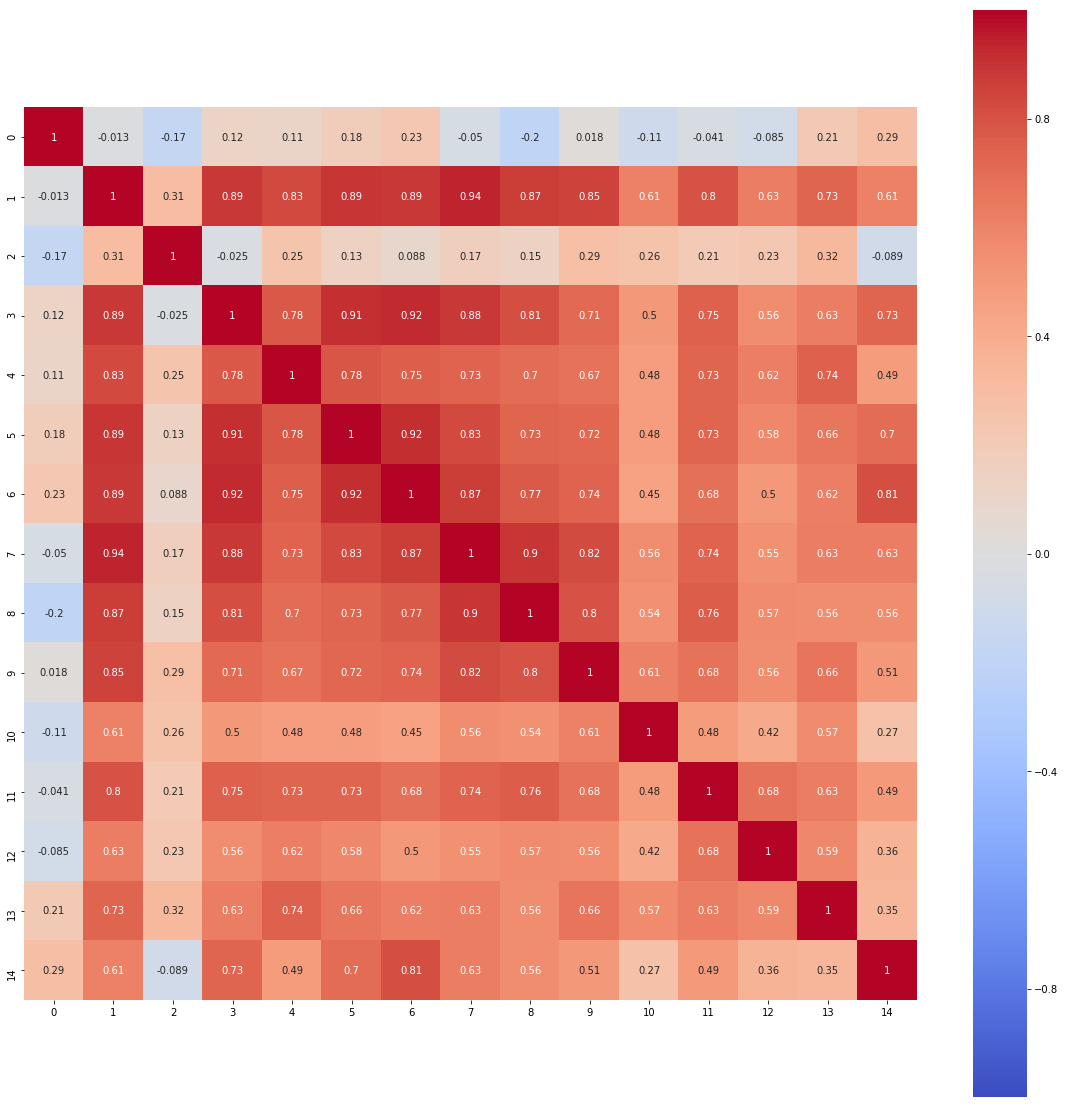

In [103]:
plt.figure(figsize=(20,20))
sns.heatmap(np.corrcoef(data.T), vmin=-1, vmax=1, center=0, cmap='coolwarm',
            square=True, annot=True)
plt.savefig('images/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## ...and covariance

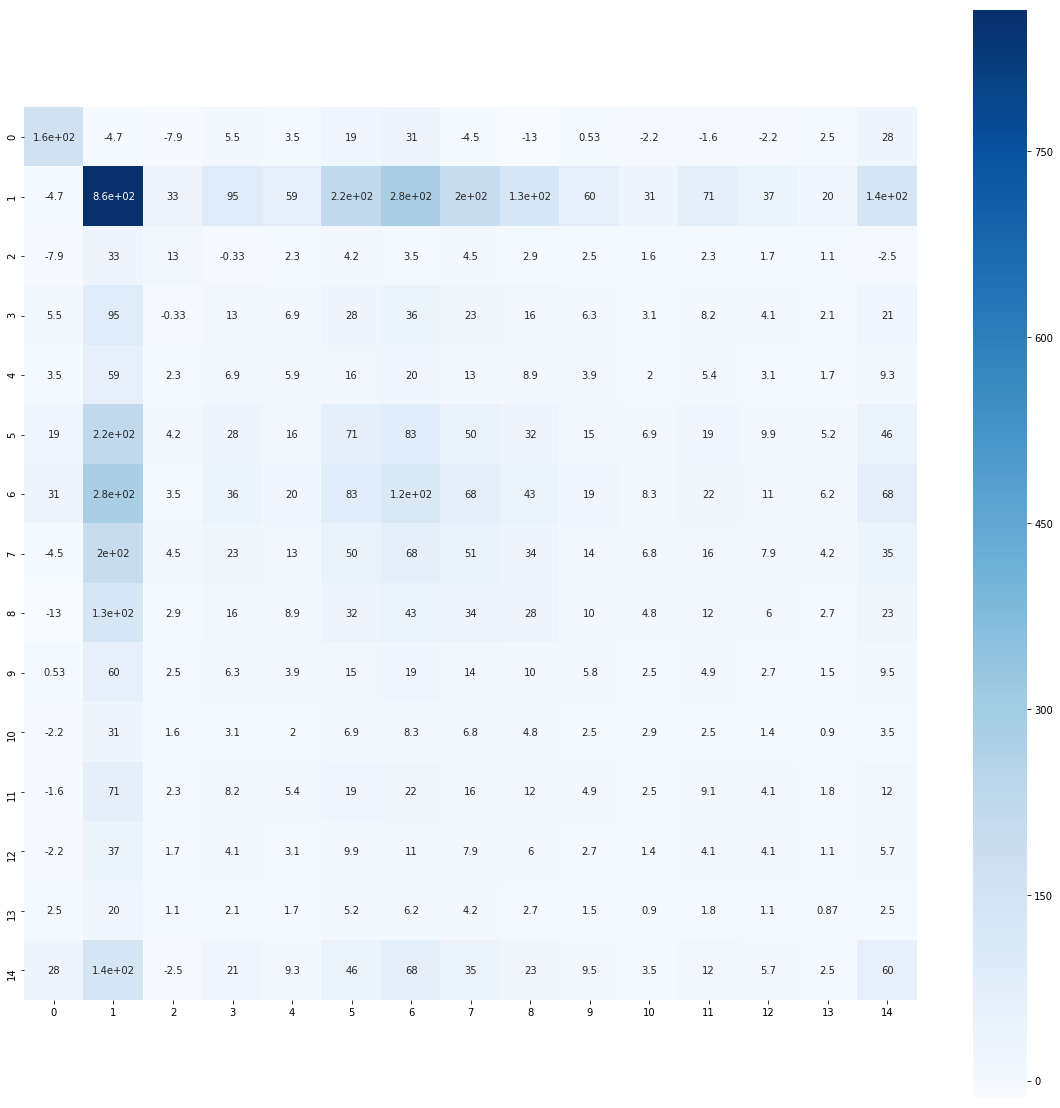

In [108]:
plt.figure(figsize=(20,20))
sns.heatmap(np.cov(data.T), cmap='Blues',
            square=True, annot=True)
plt.savefig('images/covariance_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## Distribution of covariance

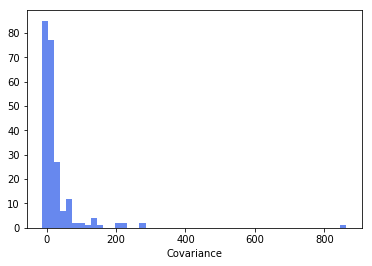

In [120]:
with sns.color_palette('coolwarm'):
    plt.hist(np.cov(data.T).flatten(), bins=50)
    plt.xlabel('Covariance')
    plt.savefig('images/covariance_dist.png', dpi=300, bbox_inches='tight')
    plt.show()

# Pandas

In [23]:
stat_names = [
    "Parameter", "Max", "Min", "Mean", "Median", "20% Trimmed Mean",
    "Standard Deviation", "Variance", "Skewness", "Kurtosis"
]

In [24]:
summary_statistics = pd.DataFrame(columns=stat_names)
summary_statistics['Parameter'] = parameter_names
summary_statistics['Max'] = np.max(data, axis=0)
summary_statistics['Min'] = np.min(data, axis=0)
summary_statistics['Mean'] = np.mean(data, axis=0)
summary_statistics['Median'] = np.median(data, axis=0)
summary_statistics['20% Trimmed Mean'] = trim_mean(data, 0.2, axis=0)
summary_statistics['Standard Deviation'] = np.std(data, axis=0)
summary_statistics['Variance'] = np.var(data, axis=0)
summary_statistics['Skewness'] = skew(data, axis=0)
summary_statistics['Kurtosis'] = kurtosis(data, axis=0)

In [25]:
summary_statistics

,Parameter,Max,Min,Mean,Median,20% Trimmed Mean,Standard Deviation,Variance,Skewness,Kurtosis
0,Age,81.00,22.0,44.884921,43.00,44.440789,12.577011,158.181201,0.281831,-0.431939
1,Weight,363.15,118.5,178.924405,176.50,176.553618,29.330790,860.295248,1.198077,5.141824
2,Height,77.75,29.5,70.148810,70.00,70.250000,3.655581,13.363272,-5.352880,58.345697
3,Adiposity Index,48.90,18.1,25.436905,25.05,25.059868,3.640865,13.255900,1.552391,6.556323
4,Neck circumference,51.20,31.1,37.992063,38.00,37.928947,2.426085,5.885889,0.549325,2.642238
5,Chest circumference,136.20,79.3,100.824206,99.65,100.127632,8.413732,70.790882,0.677492,0.944086
6,Abdomen circumference,148.10,69.4,92.555952,90.95,91.807895,10.761661,115.813338,0.833419,2.180736
7,Hip circumference,147.70,85.0,99.904762,99.30,99.328289,7.149829,51.120057,1.488201,7.300217
8,Thigh circumference,87.30,47.2,59.405952,59.00,59.130921,5.239525,27.452623,0.816313,2.589401
9,Knee circumference,49.10,33.0,38.590476,38.50,38.491447,2.407015,5.793719,0.513663,1.016875


In [58]:
with open('summary_statistics_table.tex', 'w') as f:
    f.write(summary_statistics.to_latex(index=True))

In [26]:
(summary_statistics['Max'] - summary_statistics['Min'] ) / summary_statistics['Standard Deviation']

0      4.691099
1      8.341064
2     13.198996
3      8.459528
4      8.284952
5      6.762754
6      7.312998
7      8.769440
8      7.653365
9      6.688784
10     8.749490
11     6.699227
12     6.892524
13     6.010320
14     5.830292
dtype: float64

In [27]:
summary_statistics['Mean']

0      44.884921
1     178.924405
2      70.148810
3      25.436905
4      37.992063
5     100.824206
6      92.555952
7      99.904762
8      59.405952
9      38.590476
10     23.102381
11     32.273413
12     28.663889
13     18.229762
14     18.938492
Name: Mean, dtype: float64

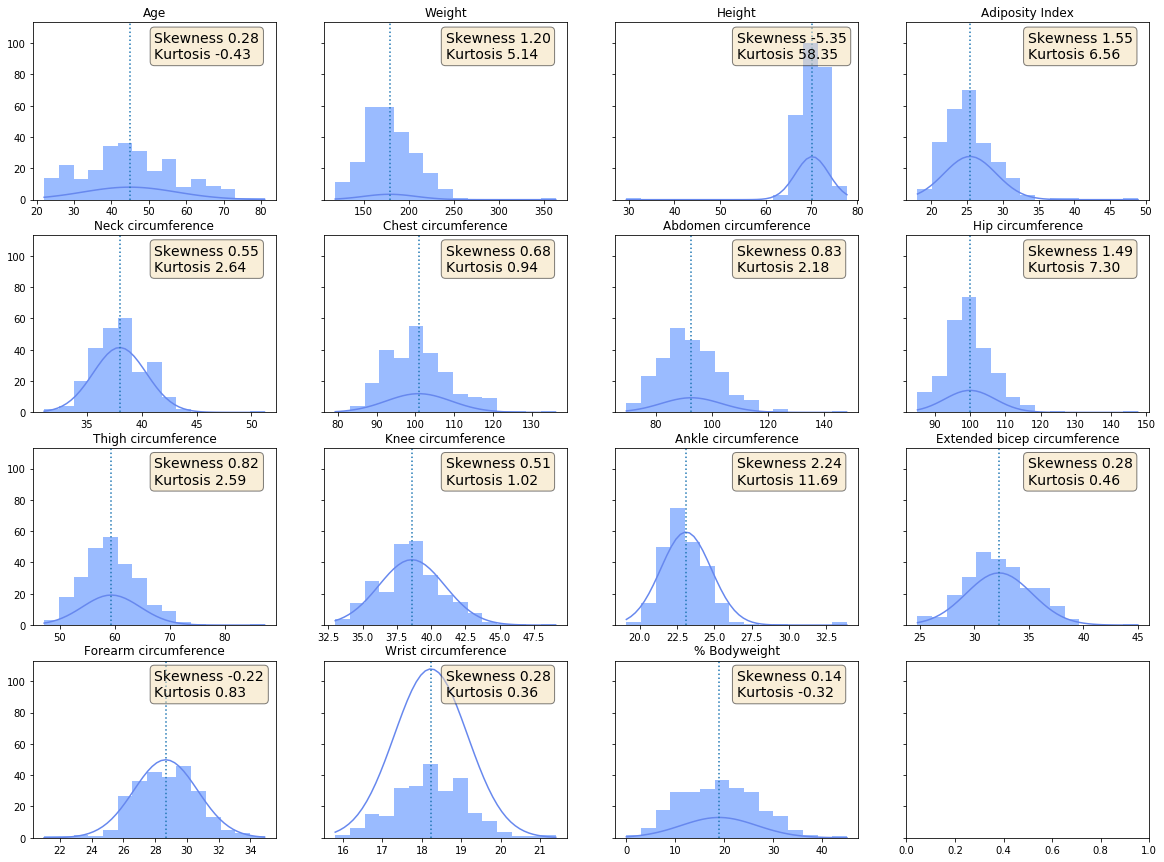

In [86]:
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
with sns.color_palette('coolwarm'):
    f, ax = plt.subplots(4, 4, figsize=(20,15), sharey=True)
#    for i in range(len(parameter_names)):
    for i in range(4):
        for j in range(4):
            if (i*4+j) < len(parameter_names):
                x = np.linspace(np.min(data[:,i*4+j]), np.max(data[:,i*4+j]))
                y = data[:,i*4+j].shape[0]*norm.pdf(x, loc=np.mean(data[:,i*4+j]), scale=np.std(data[:,i*4+j]))
                ax[i,j].plot(x, y)
                ax[i,j].hist(data[:,i*4+j], bins=15)
                ax[i,j].axvline(x=np.mean(data[:,i*4+j]), linestyle='dotted')
                ax[i,j].set_title(f'{parameter_names[i*4+j]}')
                textstr = f'Skewness {skew(data[:,i*4+j]):0.2f}\nKurtosis {kurtosis(data[:,i*4+j]):0.2f}'
                ax[i,j].text(0.5, 0.95, textstr, transform=ax[i,j].transAxes,
                             fontsize=14, verticalalignment='top', bbox=props)
plt.savefig('images/histogram_array.png', dpi=300, bbox_inches='tight')
plt.show()

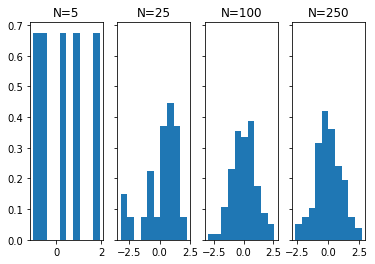

In [101]:
N = [5, 25, 100, 250]
D = [norm.rvs(size=n) for n in N]

f, axs = plt.subplots(1, len(N), sharey='all')

for _ in range(len(N)):
    axs[_].hist(D[_], density=True)
    axs[_].set_title(f'N={N[_]}')

plt.savefig('sample_size.png', dpi=300, bbox_inches='tight')
plt.show()